<a href="https://colab.research.google.com/github/Sunayana921/Sunayana921-Data-Analyst/blob/main/Hospital_stay_prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "Hospital Patient Dataset.csv"  # Adjust the path as needed
df = pd.read_csv(file_path)

# Display the first few rows to verify the structure
print("Dataset preview:")
print(df.head())

# Drop irrelevant columns (Patient_ID and Date are not used for prediction)
df = df.drop(columns=["Patient_ID", "Date"])

# One-hot encode categorical variables: Department, Condition_Type, Age_Group, and Discharge_Status
df = pd.get_dummies(df, columns=["Department", "Condition_Type", "Age_Group", "Discharge_Status"], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop(columns=["Length_of_Stay"])
y = df["Length_of_Stay"]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f} days")
print(f"Mean Squared Error (MSE): {mse:.2f} days²")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} days")


Dataset preview:
   Patient_ID        Date        Department  \
0           1  2023-05-06               ICU   
1           2  2023-12-13       Orthopedics   
2           3  2023-01-17               ICU   
3           4  2023-09-16        Pediatrics   
4           5  2023-11-29  General Medicine   

                          Condition_Type  Length_of_Stay Age_Group  \
0                                 Stroke               7       61+   
1                               Fracture               9     13-24   
2                            Alzheimer’s              11       61+   
3                                 Asthma               3      0-12   
4  Chronic Obstructive Pulmonary Disease               9     49-60   

       Discharge_Status  
0                  Home  
1                  Home  
2  Transferred to Rehab  
3                  Home  
4  Transferred to Rehab  

Model Performance Metrics:
Mean Absolute Error (MAE): 1.61 days
Mean Squared Error (MSE): 4.05 days²
Root Mean Squared Err

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

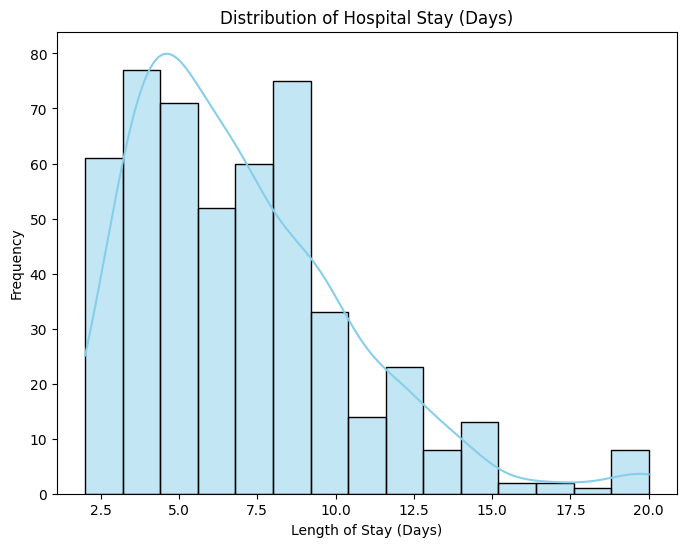

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color="skyblue", bins=15)
plt.title("Distribution of Hospital Stay (Days)")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Frequency")
plt.show()

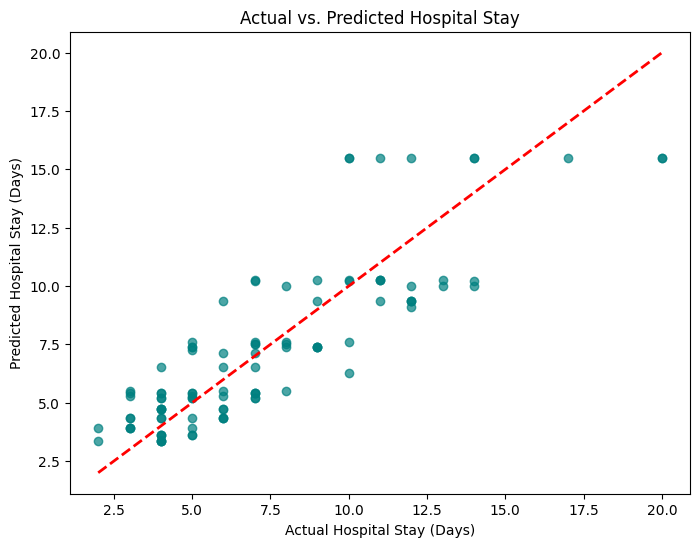

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="teal", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs. Predicted Hospital Stay")
plt.xlabel("Actual Hospital Stay (Days)")
plt.ylabel("Predicted Hospital Stay (Days)")
plt.show()

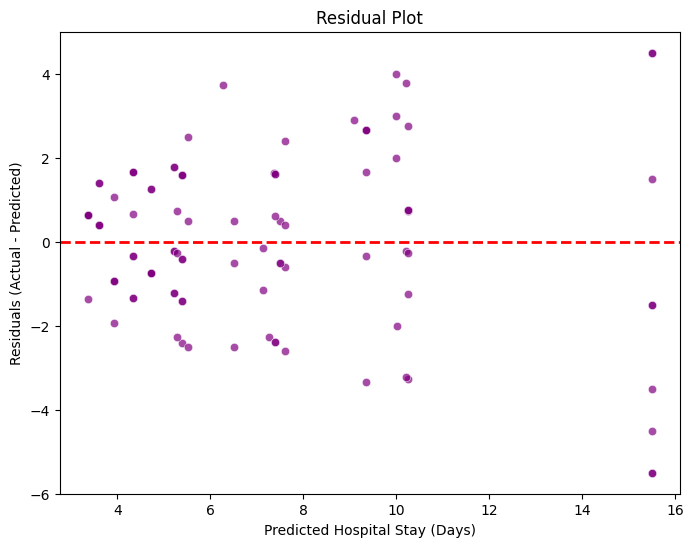

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color="purple", alpha=0.7)
plt.axhline(0, color="red", linestyle="--", lw=2)
plt.title("Residual Plot")
plt.xlabel("Predicted Hospital Stay (Days)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

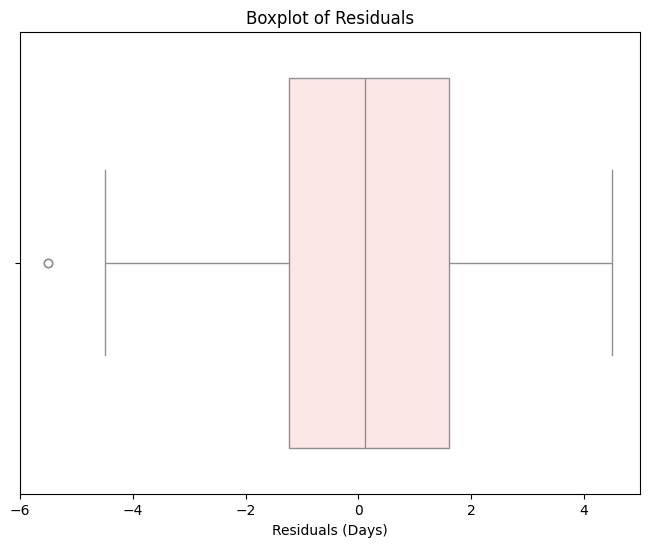

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=residuals, color="mistyrose")
plt.title("Boxplot of Residuals")
plt.xlabel("Residuals (Days)")
plt.show()